#Data Import and Cleaning:

In [6]:
# Step 1: Import the pandas
import pandas as pd

# Step 2: Load the dataset from the CSV file
file_path = '/content/global_power_plant_database.csv'
data = pd.read_csv(file_path)

# Step 3: Display the first few rows of the dataset to inspect its structure
print("First few rows of the dataset:")
print(data.head())

# Step 4: Display basic info to check for missing values and data types
print("\nDataset Information:")
data.info()

# Step 5: Calculate the percentage of missing values in each column
missing_data_percentage = data.isnull().mean() * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_data_percentage)

# Step 6: Drop columns with more than 90% missing values
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3']  # Drop columns with excessive missing values
data_cleaned = data.drop(columns=columns_to_drop)

# Step 7: Impute missing values for 'commissioning_year' with the median
data_cleaned['commissioning_year'].fillna(data_cleaned['commissioning_year'].median(), inplace=True)

# Step 8: Impute missing values in the 'generation_gwh_*' columns with their median values
generation_columns = [col for col in data_cleaned.columns if 'generation_gwh' in col]
for col in generation_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Step 9: Verify that the cleaning worked by checking the remaining missing values
remaining_missing_values = data_cleaned.isnull().sum()
print("\nRemaining Missing Values After Cleaning:")
print(remaining_missing_values)

# Step 10: Display the cleaned dataset (first few rows)
print("\nCleaned Dataset Preview:")
print(data_cleaned.head())


First few rows of the dataset:
  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ...  estimated_generation_gw

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# Exploratory Data Analysis (EDA)


Summary of Key Statistics for Numerical Columns:
        capacity_mw      latitude     longitude  commissioning_year  \
count  20691.000000  20691.000000  20691.000000        20691.000000   
mean     193.827480     27.471471     30.185100         2003.301977   
std      559.095408     26.597559     69.507529           12.241092   
min        1.000000    -77.847000   -179.977700         1900.000000   
25%        7.000000     17.540000     -8.061250         2006.000000   
50%       23.100000     37.450000     14.379500         2006.000000   
75%      100.000000     46.321200    100.761750         2006.000000   
max    22500.000000     71.010900    179.388700         2018.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count            4997.000000         20691.000000         20691.000000   
mean             2016.698619           124.966476           490.583561   
std                 2.042783           268.539073           695.112045   
min            

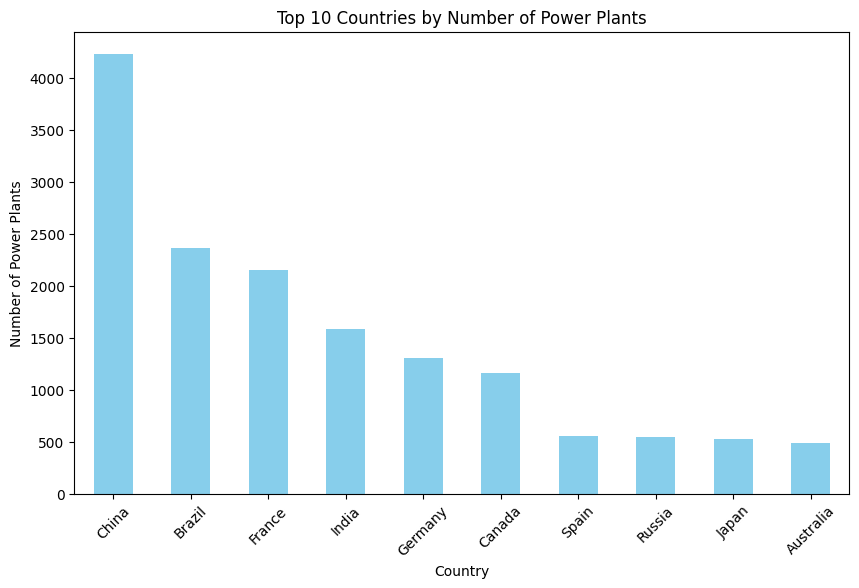

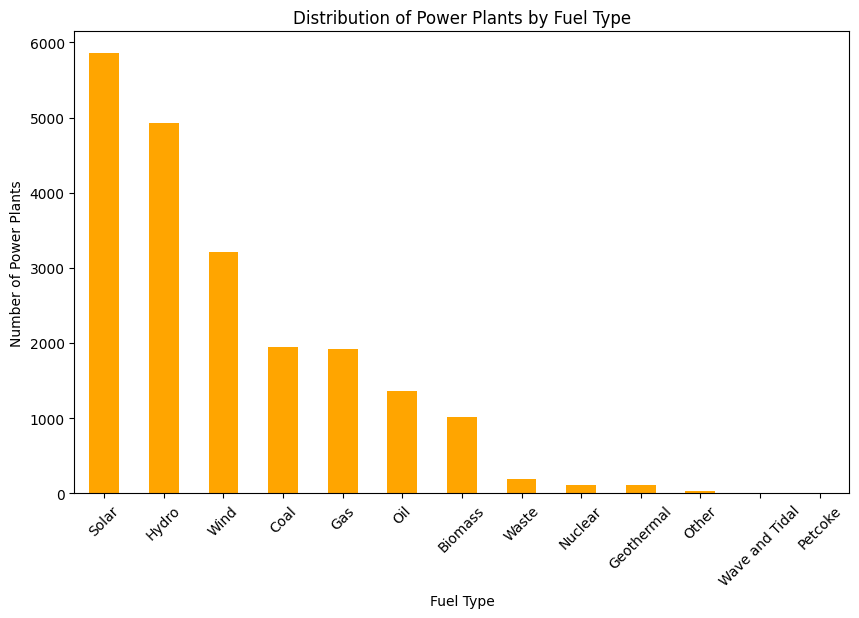

In [7]:
# Step 1: Summarize key statistics for numerical columns
print("Summary of Key Statistics for Numerical Columns:")
numerical_summary = data_cleaned.describe()
print(numerical_summary)

# Step 2: Exploring the distribution of power plants by country
print("\nDistribution of Power Plants by Country:")
plants_by_country = data_cleaned['country_long'].value_counts()
print(plants_by_country)

# Step 3: Exploring the distribution of power plants by primary fuel type
print("\nDistribution of Power Plants by Fuel Type:")
plants_by_fuel = data_cleaned['primary_fuel'].value_counts()
print(plants_by_fuel)

# Step 4: Visualize the distribution of power plants by country
import matplotlib.pyplot as plt

# Plot the top 10 countries by number of power plants
plt.figure(figsize=(10, 6))
plants_by_country[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Power Plants')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45)
plt.show()

# Step 5: Visualize the distribution of power plants by fuel type
plt.figure(figsize=(10, 6))
plants_by_fuel.plot(kind='bar', color='orange')
plt.title('Distribution of Power Plants by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45)
plt.show()


# Statistical Analysis:

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.

Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [8]:
from scipy import stats

# Step 1: Group data by fuel type and calculate key statistics (mean, median, std) for power output (capacity_mw)
print("Statistical Analysis of Power Output by Fuel Type:")
power_output_by_fuel = data_cleaned.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'median', 'std'])
print(power_output_by_fuel)

# Step 2: Perform hypothesis testing
# We will test if the mean power output differs significantly between two fuel types (e.g., 'Coal' and 'Gas')
coal_output = data_cleaned[data_cleaned['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
gas_output = data_cleaned[data_cleaned['primary_fuel'] == 'Gas']['capacity_mw'].dropna()

# Step 3: Perform an independent t-test (two-sample t-test)
t_statistic, p_value = stats.ttest_ind(coal_output, gas_output)

# Step 4: Interpret the result of the hypothesis test
alpha = 0.05  # Significance level
print("\nT-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: The mean power output between Coal and Gas power plants is significantly different.")
else:
    print("Fail to reject the null hypothesis: The mean power output between Coal and Gas power plants is not significantly different.")

Statistical Analysis of Power Output by Fuel Type:
                       mean     median          std
primary_fuel                                       
Biomass           25.495745    12.0000    40.293906
Coal             832.394717   600.0000   895.580127
Gas              405.247528   180.0000   617.117533
Geothermal        73.615487    34.0000   101.012332
Hydro            170.473036    25.0000   618.341046
Nuclear         2305.052566  2000.0000  1486.457111
Oil              152.851066    11.3700   479.301330
Other            112.609630    72.0000   176.627711
Petcoke           62.977500    62.9775          NaN
Solar             22.895037    10.0000    49.689239
Waste             15.507637    10.0000    17.121209
Wave and Tidal   171.333333   240.0000   131.245317
Wind              39.776738    28.0000   114.613983

T-Test Results:
T-statistic: 17.258301146911144
P-value: 2.3539338542357072e-64
Reject the null hypothesis: The mean power output between Coal and Gas power plants is s

# Time Series Analysis:

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

<Figure size 1200x800 with 0 Axes>

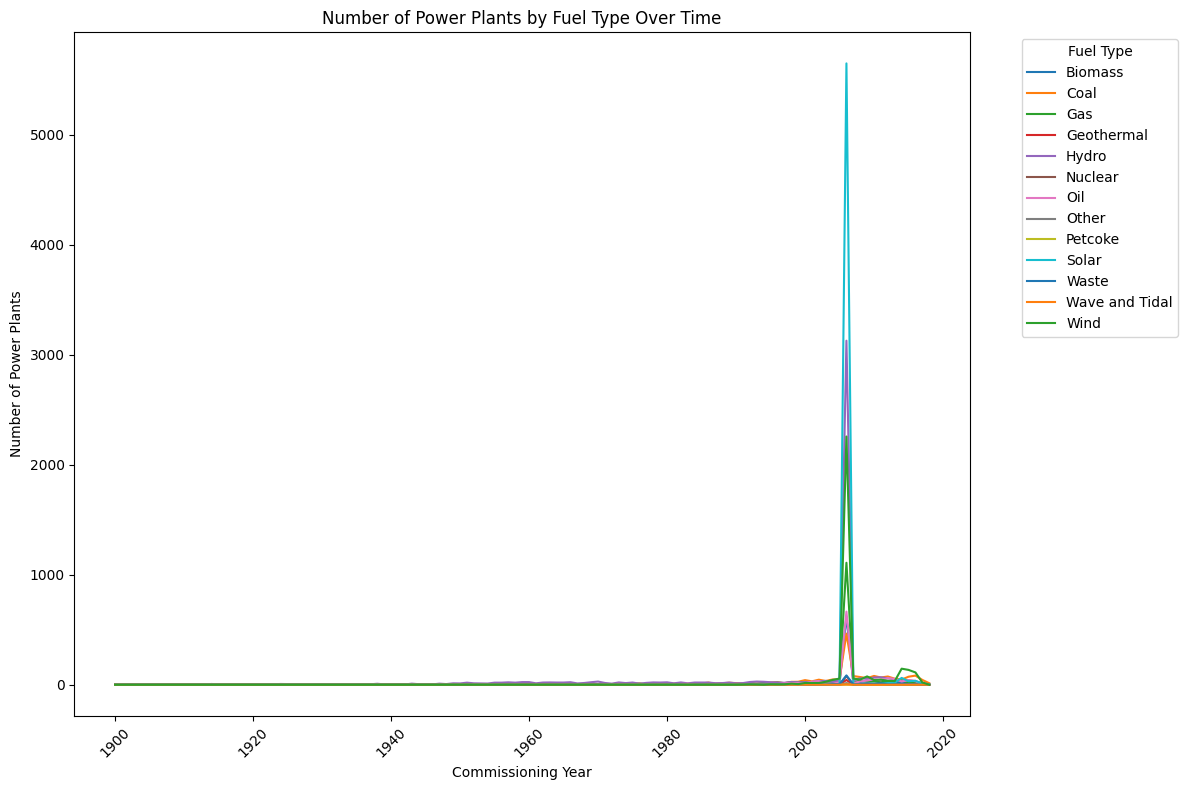

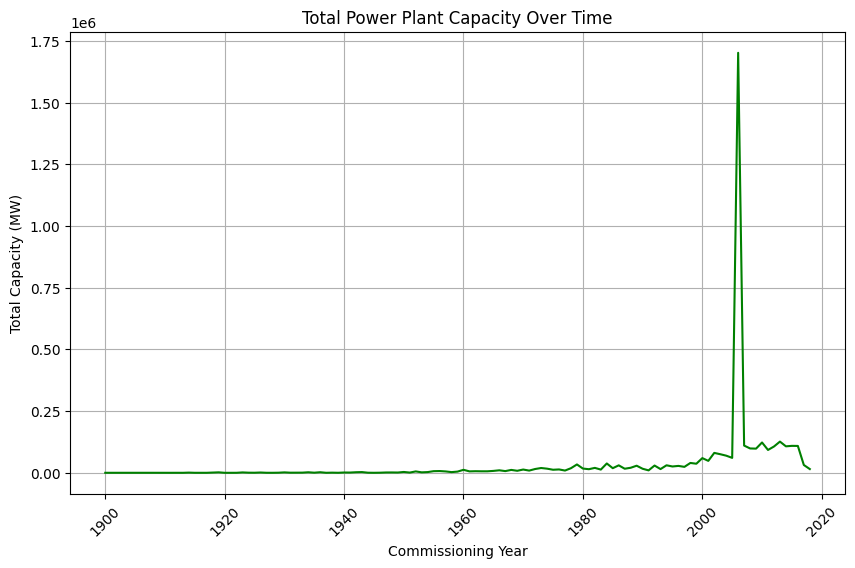

In [9]:
# Step 1: Filter out rows where commissioning_year is missing or irrelevant
data_cleaned = data_cleaned.dropna(subset=['commissioning_year'])

# Step 2: Convert commissioning_year to an integer type for easier grouping
data_cleaned['commissioning_year'] = data_cleaned['commissioning_year'].astype(int)

# Step 3: Group by commissioning_year and fuel type to count the number of power plants over time
power_plants_by_year_fuel = data_cleaned.groupby(['commissioning_year', 'primary_fuel']).size().unstack()

# Step 4: Fill missing values with 0 (in case some years have no plants for specific fuel types)
power_plants_by_year_fuel = power_plants_by_year_fuel.fillna(0)

# Step 5: Plot the evolution of power plants by fuel type over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
power_plants_by_year_fuel.plot(kind='line', stacked=False, figsize=(12, 8))
plt.title('Number of Power Plants by Fuel Type Over Time')
plt.xlabel('Commissioning Year')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Analyzing the trend in power plant capacities over time
capacity_by_year = data_cleaned.groupby('commissioning_year')['capacity_mw'].sum()

plt.figure(figsize=(10, 6))
capacity_by_year.plot(kind='line', color='green')
plt.title('Total Power Plant Capacity Over Time')
plt.xlabel('Commissioning Year')
plt.ylabel('Total Capacity (MW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# Advanced Visualization:

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

<ipython-input-10-07c43ab72f0f>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(fuel_types))  # Use a colormap for distinct colors


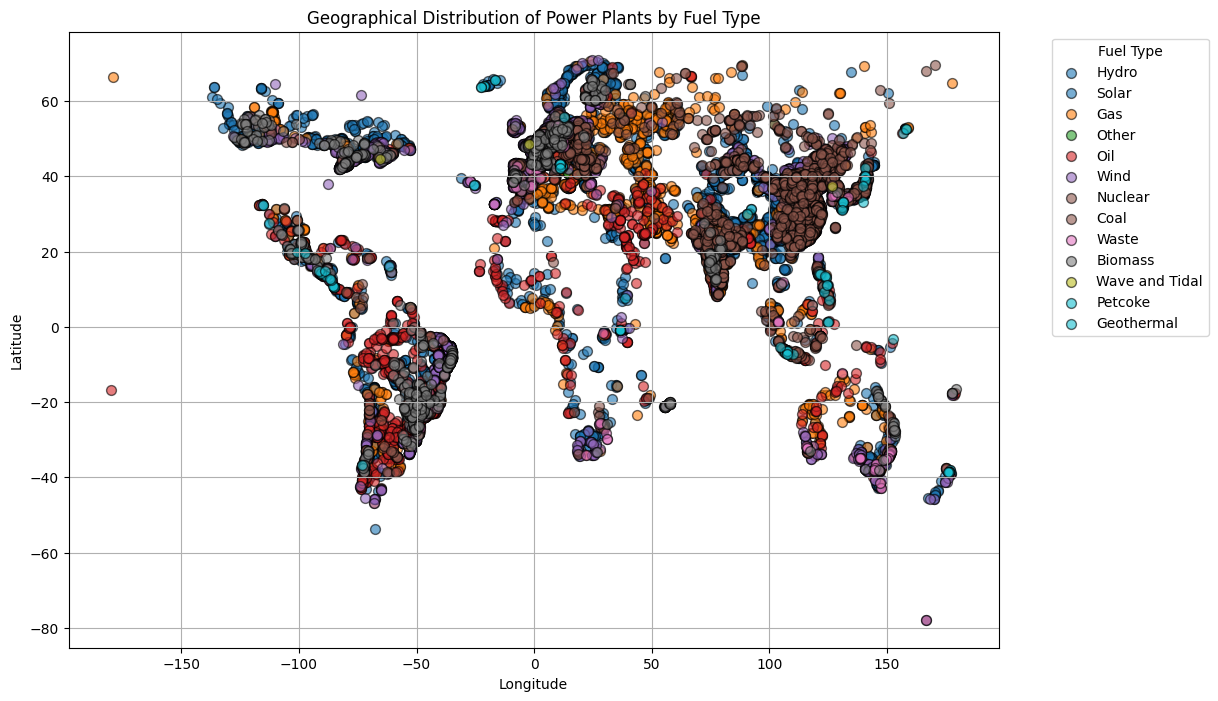

<Figure size 1200x600 with 0 Axes>

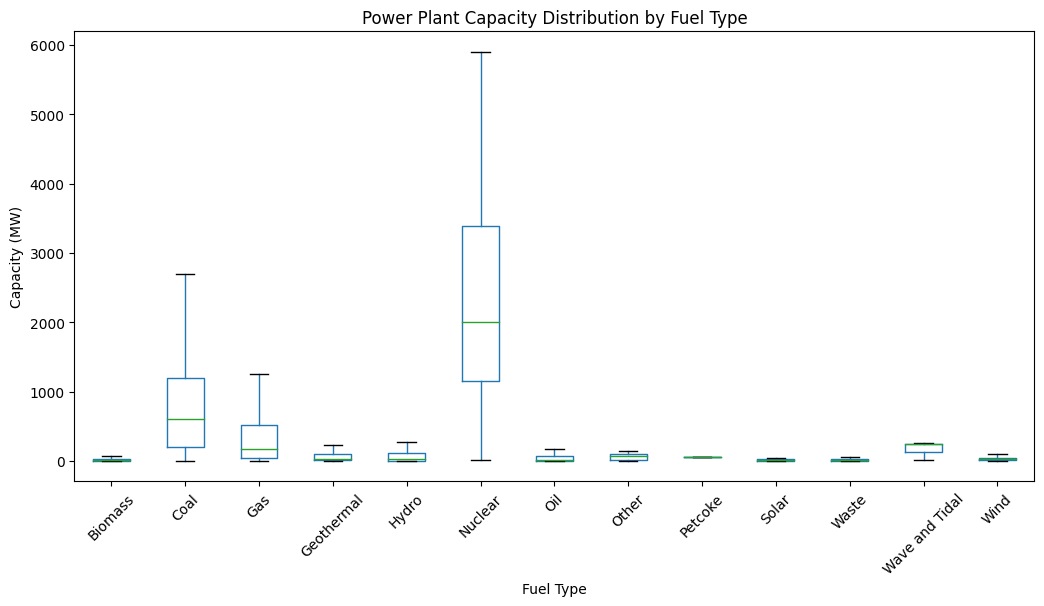

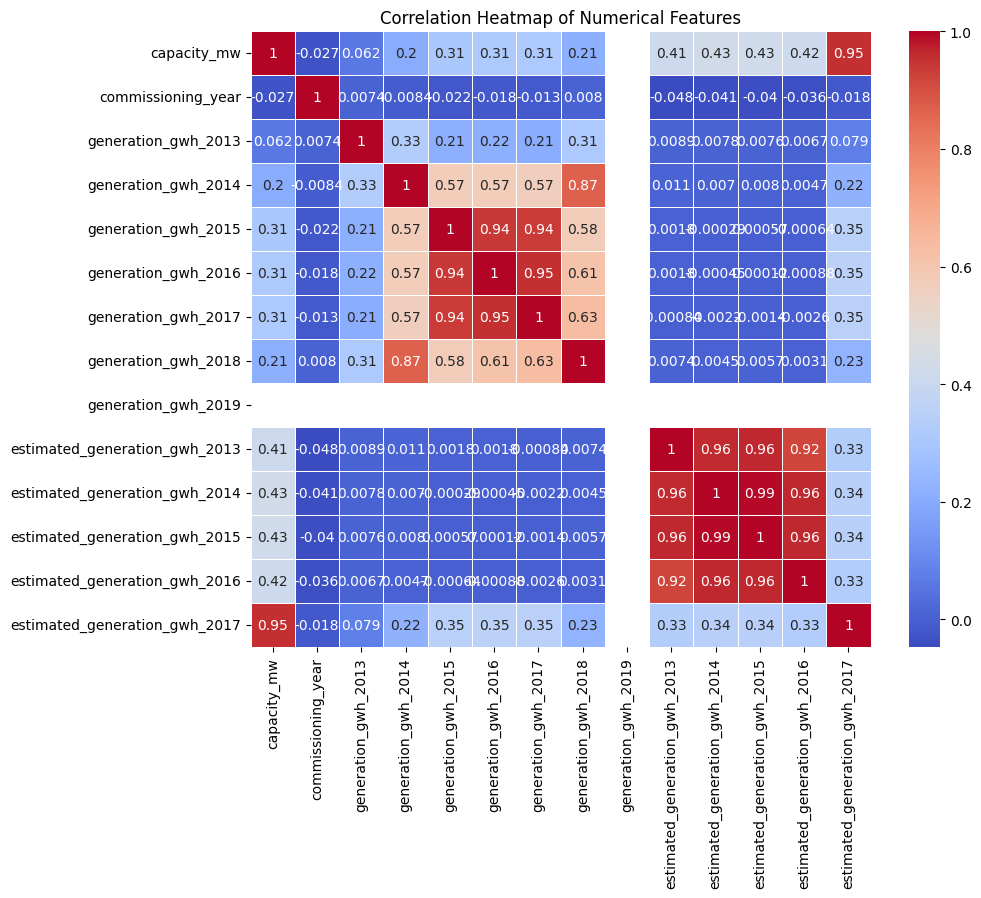

In [10]:
# Step 1: Create a scatter plot for the geographical distribution of power plants
# Using latitude and longitude data to plot locations of power plants

plt.figure(figsize=(12, 8))

# Scatter plot of power plants by fuel type
fuel_types = data_cleaned['primary_fuel'].unique()
colors = plt.cm.get_cmap('tab10', len(fuel_types))  # Use a colormap for distinct colors

for i, fuel in enumerate(fuel_types):
    subset = data_cleaned[data_cleaned['primary_fuel'] == fuel]
    plt.scatter(subset['longitude'], subset['latitude'], label=fuel, alpha=0.6, c=[colors(i)], edgecolor='black', s=50)

plt.title('Geographical Distribution of Power Plants by Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Step 2: Create a box plot to compare power plant capacity across different fuel types
plt.figure(figsize=(12, 6))

# Box plot to visualize the distribution of power plant capacity by fuel type
data_cleaned.boxplot(column='capacity_mw', by='primary_fuel', grid=False, showfliers=False, figsize=(12, 6))
plt.title('Power Plant Capacity Distribution by Fuel Type')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Fuel Type')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)
plt.show()

# Step 3: Create a heatmap for the correlation between numerical columns
import seaborn as sns

# Generate a correlation matrix of the numerical columns
correlation_matrix = data_cleaned[['capacity_mw', 'commissioning_year'] + generation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.

Ran into a problem here, probably the task is not set well:

You tried to calculate the covariance matrix of the capacity_by_country array, which is likely a 1D array (a single vector of values). However, covariance matrices are only meaningful for multiple variables. In this case, you have just one variable (the total capacities by country), so calculating the covariance doesn't make sense in this context.

If you only have one variable, there's no point in calculating eigenvalues or eigenvectors because they describe variance across multiple variables

NOTE TO CHECHER - Did we even learn what is a covariance matrix?

Capacities by Country:
[3.00550000e+02 1.07118000e+03 1.52900000e+03 3.29130790e+04
 3.27100000e+03 7.60000000e+00 6.58520160e+04 1.12271000e+04
 5.76400000e+03 5.71700000e+01 1.34048000e+04 6.05000000e+01
 2.29306000e+02 1.18400000e+04 9.25220000e+03 7.58630000e+03
 3.98550000e+03 8.53490000e+03 1.56312000e+03 1.47589271e+05
 5.86000000e+02 1.48220000e+03 7.46000000e+02 3.36640000e+01
 1.43578700e+05 2.24756487e+04 1.41506738e+06 1.20300000e+03
 8.81580000e+02 3.05704000e+03 6.25900000e+02 1.09240000e+04
 9.28050000e+01 1.96840000e+03 3.79680000e+03 1.46800000e+03
 1.68717000e+04 1.12040375e+05 1.07332000e+02 8.08520000e+03
 1.85809000e+03 1.58738000e+04 4.24548000e+03 3.41835000e+04
 1.33190000e+02 5.82983680e+04 2.54190000e+03 4.02390000e+03
 1.17967600e+04 3.17380000e+02 1.10615929e+05 4.46810000e+02
 3.83140000e+03 2.10800000e+03 5.10420000e+02 7.04000000e+01
 1.82370000e+01 1.50500000e+02 1.46586500e+04 3.68910000e+03
 2.52600000e+02 1.36300000e+02 2.16487000e+03 3.27450000e+03
 

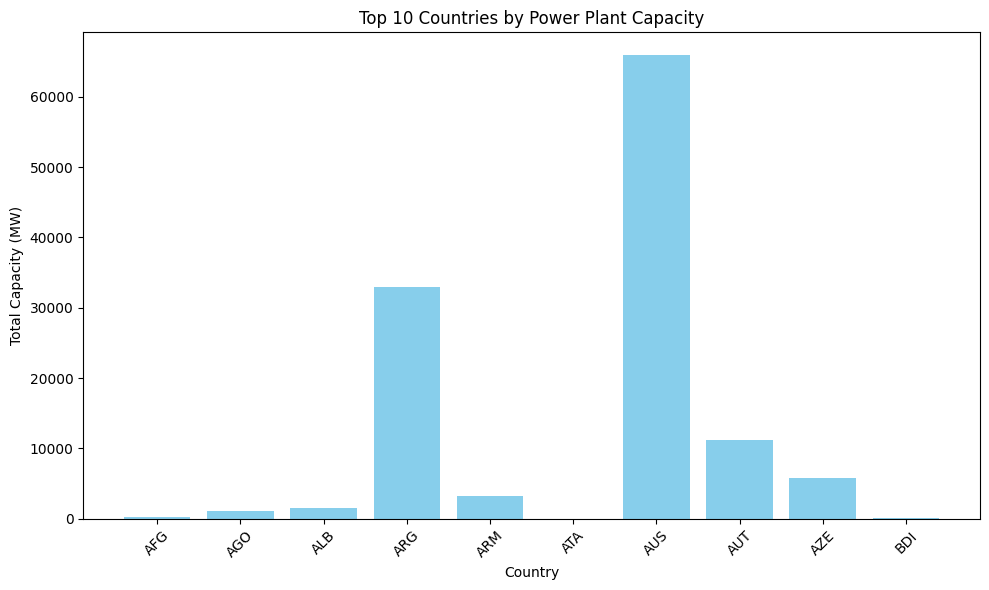

In [13]:
# Step 1: Compute the sum of all capacities by country
capacity_by_country = data_cleaned.groupby('country')['capacity_mw'].sum().to_numpy()

# If you just want to analyze capacity by country, no need for covariance or eigenvalues.
# You can simply display or plot the data.
print("Capacities by Country:")
print(capacity_by_country)

# Visualize the total capacity per country using a bar plot
import matplotlib.pyplot as plt

# Get country names and their corresponding capacities
countries = data_cleaned.groupby('country')['capacity_mw'].sum().index
capacity_values = data_cleaned.groupby('country')['capacity_mw'].sum().values

plt.figure(figsize=(10, 6))
plt.bar(countries[:10], capacity_values[:10], color='skyblue')  # Plot the top 10 countries by capacity
plt.title('Top 10 Countries by Power Plant Capacity')
plt.xlabel('Country')
plt.ylabel('Total Capacity (MW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

Example 1 - Complex Filtering with NumPy and Pandas

1. Filter power plants with a capacity greater than 500 MW.
2. Only include plants that are either coal or gas-fuele

In [14]:
# We want plants with capacity > 500 MW and primary fuel as 'Coal' or 'Gas'
import numpy as np

# Create a NumPy condition for the filter
condition = (data_cleaned['capacity_mw'] > 500) & np.isin(data_cleaned['primary_fuel'], ['Coal', 'Gas'])

# Apply the condition to filter the data in Pandas
filtered_data = data_cleaned[condition]

print(filtered_data.head())

# Step 2: Get the number of filtered power plants
num_filtered_plants = filtered_data.shape[0]
print(f"\nNumber of power plants with capacity > 500 MW and fueled by Coal or Gas: {num_filtered_plants}")

   country country_long            name   gppd_idnr  capacity_mw  latitude  \
19     DZA      Algeria     Ain Djasser  WRI1023776        520.0   35.8665   
27     DZA      Algeria           Arbaa  WRI1023777        560.0   36.5988   
36     DZA      Algeria  Hadjret Ennous  WRI1023768       1200.0   36.5767   
39     DZA      Algeria   Hassi Messoud  WRI1023779        600.0   31.6703   
47     DZA      Algeria           Jijel  WRI1023775        588.0   36.8139   

    longitude primary_fuel  commissioning_year  \
19     6.0262          Gas                2006   
27     3.1375          Gas                2010   
36     2.0797          Gas                2009   
39     6.0531          Gas                2015   
47     5.8760          Gas                2006   

                                                owner  ...  \
19  SociÃ©te AlgÃ©rienne de Production de l\'Elect...  ...   
27                                           Sonelgaz  ...   
36                  Sharikat Kahraba Hadjret

Sophisitcated visualization with NumPy and Matplotlib

The distribution of power plant capacities across different fuel types.

Add a trend line using NumPy’s polyfit() function to analyze the trend in capacity over time.

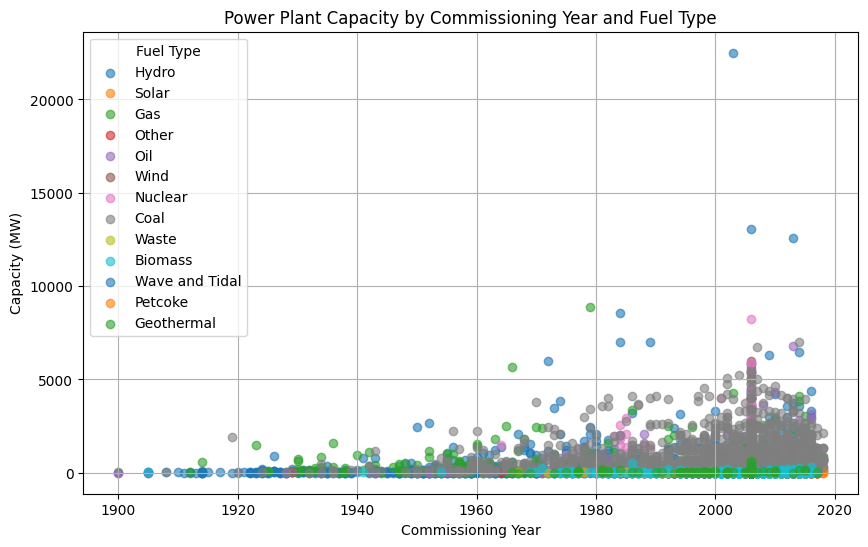

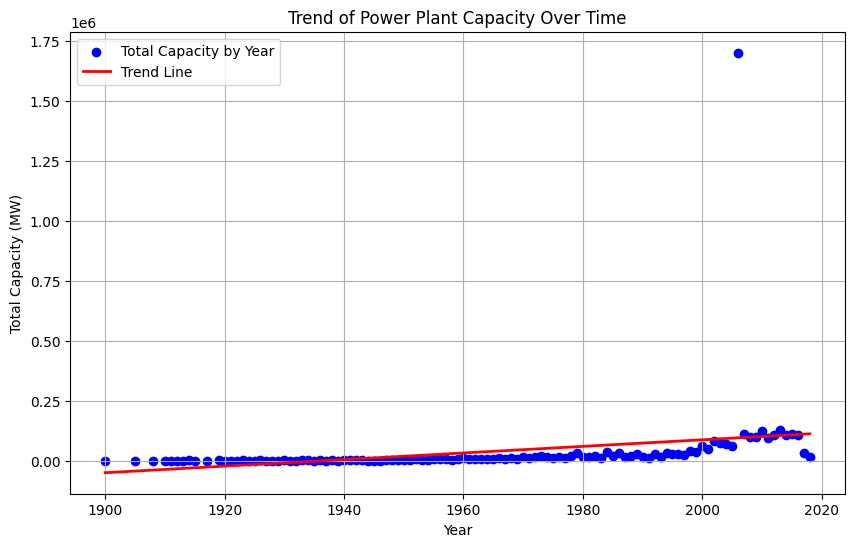

In [15]:
import matplotlib.pyplot as plt

# Step 1: Visualize power plant capacities by fuel type using a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot: Fuel type vs. Capacity
for fuel in data_cleaned['primary_fuel'].unique():
    subset = data_cleaned[data_cleaned['primary_fuel'] == fuel]
    plt.scatter(subset['commissioning_year'], subset['capacity_mw'], label=fuel, alpha=0.6)

plt.title('Power Plant Capacity by Commissioning Year and Fuel Type')
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity (MW)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

# Step 2: Add a trend line for total capacity over time

# Group by commissioning year to get the total capacity per year
capacity_by_year = data_cleaned.groupby('commissioning_year')['capacity_mw'].sum()

# Use NumPy's polyfit to find a trend line (degree 1 for a linear fit)
years = capacity_by_year.index
capacities = capacity_by_year.values
trend_line = np.polyfit(years, capacities, deg=1)
trend_line_function = np.poly1d(trend_line)

# Plot the trend line along with the original data
plt.figure(figsize=(10, 6))
plt.scatter(years, capacities, label='Total Capacity by Year', color='blue')
plt.plot(years, trend_line_function(years), label='Trend Line', color='red', linewidth=2)

plt.title('Trend of Power Plant Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Capacity (MW)')
plt.legend()
plt.grid(True)
plt.show()
